In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import pandas as pd
from ipywidgets import interactive, fixed

import os
import glob
import scipy.special as sf

# Solving Equations of Motion for Charged Particle

In this project, we numerically solve the equations of motion for a positively charged particle moving in constant electric and magnetic fields with drag force, as described in the MacKinnon notes.

The equation of motion in vector notation is given by:

$$
m\frac{dv}{dt} = qv \times B - \gamma v + qE \quad (1)
$$

Where:
- $ m $ is the mass of the particle,
- $ v $ is the velocity of the particle,
- $ q $ is the charge of the particle,
- $ B $ is the magnetic field,
- $ \gamma $ is the drag coefficient,
- $ E $ is the electric field.

The motion is confined to the xy plane. After introducing dimensionless time variable $ \tau = \frac{tqB}{m} $ and position variables $ \tilde{x} = \frac{xqB}{m} $ and $ \tilde{y} = \frac{yqB}{m} $, equations (1) are transformed into component form:

$$
\frac{dv_x}{d\tau} = +v_y - \frac{\gamma}{qB} v_x \quad (2)
$$
$$
\frac{dv_y}{d\tau} = -v_x - \frac{\gamma}{qB} v_y + \frac{E}{B} \quad (3)
$$
$$
\frac{d\tilde{x}}{d\tau} = v_x \quad (4)
$$
$$
\frac{d\tilde{y}}{d\tau} = v_y \quad (5)
$$

The parameters of the system have the following values (in SI units):
- $ B = 10 \, \text{T} $
- $ q = 1.6 \times 10^{-16} \, \text{C} $
- $ m = 1.6 \times 10^{-21} \, \text{kg} $
- $ \gamma = 8.0 \times 10^{-17} \, \text{kg s}^{-1} $
- $ E = 10 \, \text{N C}^{-1} $
- $ v_0 = 10 \, \text{m s}^{-1} $

The factor $ \frac{qB}{m} = 10^6 \, \text{s}^{-1} $, meaning going from $ \tau = 0 $ to $ \tau = 1 $ corresponds to a real time difference of $ 10^{-6} \, \text{s} $, or 1 µs.

For small drag, the dominant direction of the particle’s trajectory is in the direction of $ E \times B $, not in the direction of the electric field. For long times, the slope of the trajectory $ \frac{dy}{dx} $ is proportional to $ \gamma $.

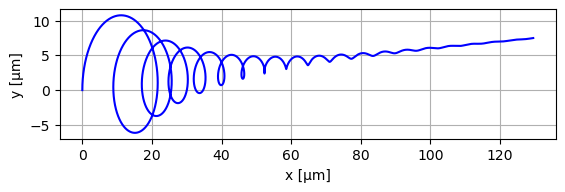

In [13]:
# Import the data for the Euler Method from the same directory
df = pd.read_csv('euler-trajectory.dat',sep=r'\s+',names=['t','x','y','vx','vy'])

plt.plot(df.x,df.y,label='Trajectory',color="Blue")

# label axes
plt.xlabel('x [μm]')
plt.ylabel('y [μm]')

# Adjust the aspect Ratio
plt.gca().set_aspect(2)

# Show grid lines
plt.grid(True)

plt.show()

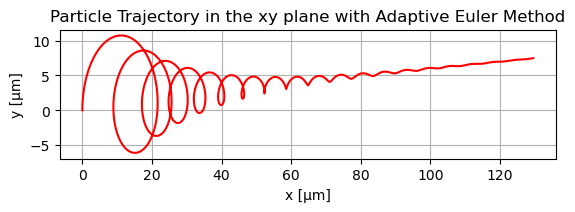

In [14]:
# Import the data for the Adaptive Euler Method from the same directory
df1 = pd.read_csv('euler-adapt-trajectory.dat',sep=r'\s+',names=['t','x','y','vx','vy'])

plt.plot(df1.x,df1.y,label='Trajectory',color="Red")

# Create a title and labels
plt.title('Particle Trajectory in the xy plane with Adaptive Euler Method')
plt.xlabel('x [μm]')
plt.ylabel('y [μm]')

# Adjust the aspect Ratio
plt.gca().set_aspect(2)

# Show grid lines
plt.grid(True)

plt.show()

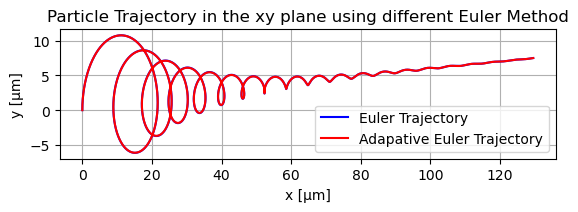

In [15]:
# Compare the two methods on the smae graph
plt.plot(df.x,df.y,label='Euler Trajectory',color="Blue")
plt.plot(df1.x,df1.y,label='Adapative Euler Trajectory',color="Red")

# Create a title and labels
plt.title('Particle Trajectory in the xy plane using different Euler Method')
plt.xlabel('x [μm]')
plt.ylabel('y [μm]')
plt.legend()

# Adjust the aspect Ratio
plt.gca().set_aspect(2)

# Show grid lines
plt.grid(True)

plt.show()